# Credit Risk Case

## Business Problems
As a Financing Company, the user wants to build a credit scoring model to predict whether the client will default or not after their loan application.

## Business Goals
Research and develop the model to predict applicants whether the applicant will default or not, and also find the best metrics since this is an imbalance class dataset.

## Preprocessing

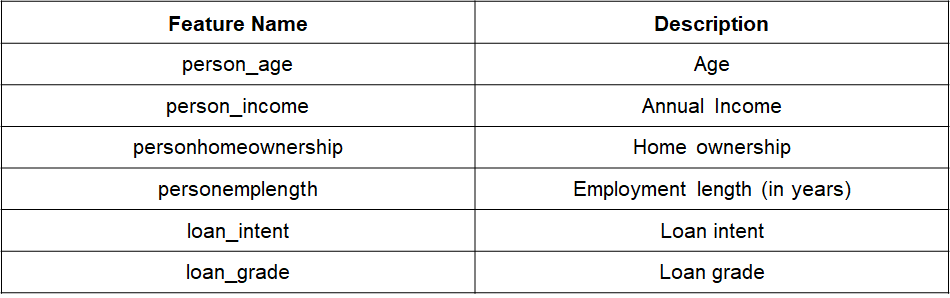

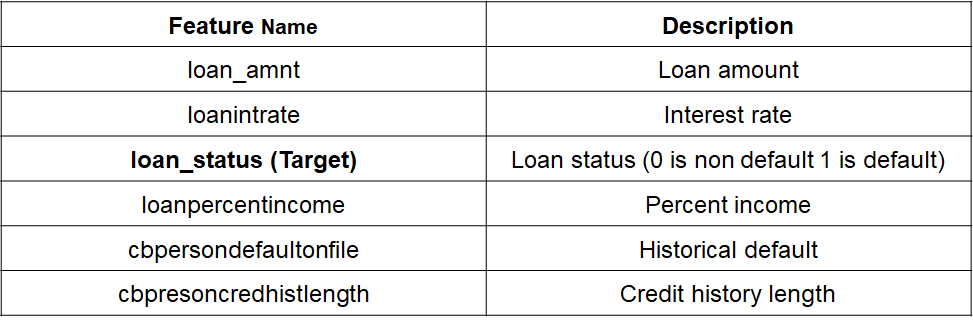

In [ ]:
# import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit = pd.read_csv('C:\\Users\\brian\\Documents\\DataScience\\ODP BNI x Mars\\trial_deployment\\credit_risk_dataset.csv')
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
print(f"This dataset will be divided into {0.2* len(credit)+1:.0f} for holdout sample, the rest {len(credit) - 0.2* len(credit):.0f} is for training and testing model.")

This dataset will be divided into 6517 for holdout sample, the rest 26065 is for training and testing model.


In [ ]:
credit.info()


# column which has null values:
  # person_emp_length
  # loan_amnt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


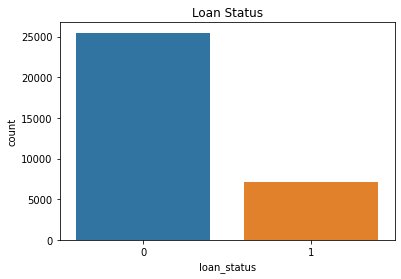

In [ ]:
sns.countplot(credit['loan_status'])
plt.title('Loan Status')
plt.show()

# has more non default applicant (0) than the default (1)
  # non default:78.183604%	
  # default: 21.816396%

In [ ]:
# percentage of loan_status

(credit['loan_status'].value_counts() / len(credit) * 100).to_frame().T

# with this proportion, it looks like we have imbalance target

,0,1
loan_status,78.183604,21.816396


## Descriptive Analysis

In [ ]:
# Numerical
credit.describe().T

# The average of:
#   age                   = 27 years old
#   income                = $ 66,074
#   employee length       = 4,7 years
#   loan amount           = $ 9589
#   loan interest rate    = 11,01 %
#   loan percent income   = 0.17
#   Credit history length = 5,8 years

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
# Categorical
credit.describe(include = 'object').T

# The most of:
#   Home Ownership          = Rent
#   Loan intent             = Education
#   Loan Grade              = A
#   Historical default      = No

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


## Handling Missing Values

In [ ]:
# List Columns with NaN
print('Total columns with nan:',len(credit.columns[credit.isna().any()]))

Total columns with nan: 2


In [ ]:
# Null Percentage
credit.isnull().sum() / len(credit) * 100

# column which has null values:
  # person_emp_length   = 2.747%
  # loan_amnt           = 9.564%

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

### person_emp_length

c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


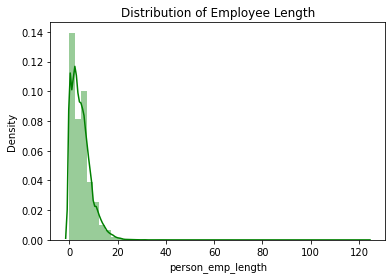

In [ ]:
sns.distplot(credit['person_emp_length'], color = 'green')
plt.title('Distribution of Employee Length')
plt.show()

# looks like we have outliers

In [ ]:
credit.describe()['person_emp_length'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
person_emp_length,31686.0,4.789686,4.14263,0.0,2.0,4.0,7.0,123.0


In [ ]:
# since it has outliers, we could fill the nulls with the median 

print(f"There are {credit['person_emp_length'].isnull().sum()} null value in 'person_emp_length' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

credit['person_emp_length'] = credit['person_emp_length'].fillna(credit['person_emp_length'].median())
print(f"There are {credit['person_emp_length'].isnull().sum()} null value in 'person_emp_length' column.")

There are 895 null value in 'person_emp_length' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'person_emp_length' column.


In [ ]:
# Null percentage check
credit.isnull().sum() / len(credit) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [ ]:
credit.describe()['person_emp_length'].to_frame().T

# we will handle that outliers later

,count,mean,std,min,25%,50%,75%,max
person_emp_length,32581.0,4.767994,4.087372,0.0,2.0,4.0,7.0,123.0


### loan_int_rate

c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


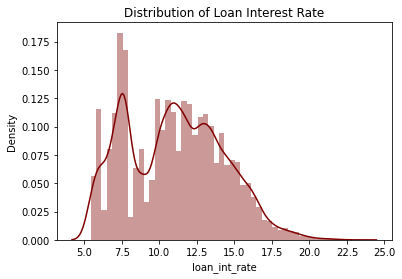

In [ ]:
sns.distplot(credit['loan_int_rate'], color = 'maroon')
plt.title('Distribution of Loan Interest Rate')
plt.show()

In [ ]:
credit.describe()['loan_int_rate'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22


In [ ]:
# filling the nulls with the mean

print(f"There are {credit['loan_int_rate'].isnull().sum()} null value in 'loan_int_rate' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

credit['loan_int_rate'] = credit['loan_int_rate'].fillna(credit['loan_int_rate'].mean())
print(f"There are {credit['loan_int_rate'].isnull().sum()} null value in 'loan_int_rate' column.")

There are 3116 null value in 'loan_int_rate' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'loan_int_rate' column.


In [ ]:
# Null percentage check
credit.isnull().sum() / len(credit) * 100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [ ]:
credit.describe()['loan_int_rate'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,32581.0,11.011695,3.081605,5.42,8.49,11.011695,13.11,23.22


## Outliers
1. person_age, 
1. person_income, 
1. person_emp_length, 
1. loan_amnt, 
1. loan_int_rate, 
1. loan_percent_income, 
1. cb_person_cred_hist_length 

In [ ]:
credit.describe().T

# is there a guy which 144 years old?
# is there a guy who work along 123 years?
# applicants who has income 6M is quite make sense, becase when we see the data there are 9 applicants who has income more than 1M.

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.000000,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.000000,79200.00,6000000.00
person_emp_length,32581.0,4.767994,4.087372,0.00,2.00,4.000000,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.000000,12200.00,35000.00
loan_int_rate,32581.0,11.011695,3.081605,5.42,8.49,11.011695,13.11,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.000000,8.00,30.00


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

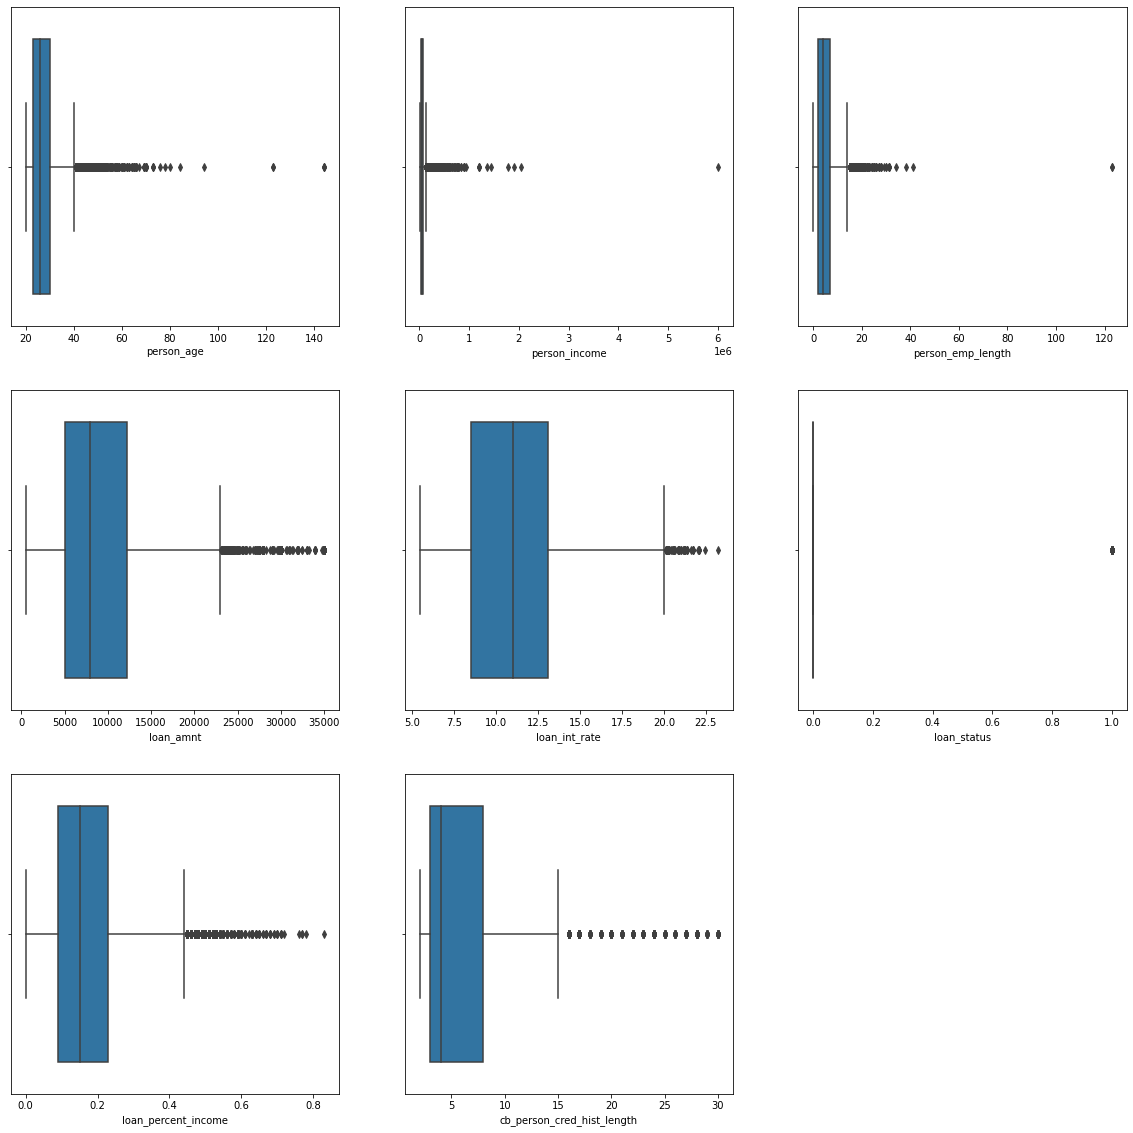

In [ ]:
plt.figure(figsize = (20,20))

n = 1
for name in credit.describe().columns:
  plt.subplot(3,3,n)
  sns.boxplot(credit[name])
  n += 1

plt.show()

### cb_person_cred_hist_length

In [ ]:
credit[credit['cb_person_cred_hist_length'] > 29]

# it seems fine so we will keep this outliers
# because when you see the person_age, the average is around 50-60 years old which is make sense that applicants has 30 years credit history length.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32320,55,50000,RENT,2.0,HOMEIMPROVEMENT,A,20000,7.510000,1,0.40,N,30
32326,64,105000,RENT,8.0,HOMEIMPROVEMENT,E,20000,18.640000,0,0.19,N,30
32353,51,37200,RENT,4.0,MEDICAL,B,3000,10.620000,1,0.08,N,30
32357,53,34000,MORTGAGE,0.0,MEDICAL,B,10000,10.390000,1,0.29,N,30
32366,58,20000,RENT,0.0,EDUCATION,B,4000,9.990000,0,0.20,N,30
32395,51,46560,MORTGAGE,2.0,PERSONAL,A,11600,8.940000,0,0.25,N,30
32403,60,49008,OWN,5.0,PERSONAL,C,12000,13.790000,0,0.24,Y,30
32421,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,Y,30
32446,51,62046,RENT,8.0,VENTURE,A,8000,11.011695,0,0.13,N,30
32448,52,83200,RENT,0.0,DEBTCONSOLIDATION,C,8000,15.960000,0,0.10,Y,30


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


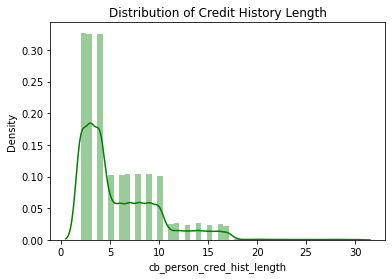

In [ ]:
sns.distplot(credit['cb_person_cred_hist_length'], color = 'green')
plt.title('Distribution of Credit History Length')
plt.show()

### person_income

In [ ]:
credit[credit['person_income'] > 1000000]

# applicants who has income 6M is quite make sense, 
  # becase when we see the data there are 9 applicants who has income more than 1M.
# we will keep these rows.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.510000,0,0.01,N,8
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.540000,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,11.011695,0,0.01,N,16
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.290000,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.740000,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.400000,0,0.00,N,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.270000,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,11.011695,0,0.00,N,21


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


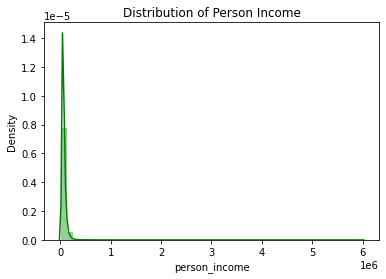

In [ ]:
sns.distplot(credit['person_income'], color = 'green')
plt.title('Distribution of Person Income')
plt.show()

### person_emp_length

In [ ]:
credit[(credit['person_emp_length'] == 123) | (credit['person_age'] == 144)]

# index 0 person_emp_length = 123
# index 81 person_age = 144
# index 183 person_age = 144
# index 210 person_emp_length = 123
# index 32297 person_age = 144

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
credit[credit['person_emp_length'] > 30]

# we prove that applicant who has employment length above 30 years is not make any sense
# by distribution, there are only 2 applicants who has employment length above 30 years and their age is around 20 years old
# we will delete these rows (index 0 and 210)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


In [ ]:
print(f"Before dropping the outliers, numbers of data is {len(credit['person_emp_length'])} rows.")

print("dropping . . .")
credit.drop(index = [0, 210], inplace = True)

print(f"After dropping the outliers, numbers of data is {len(credit['person_emp_length'])} rows.")

Before dropping the outliers, numbers of data is 32581 rows.
dropping . . .
After dropping the outliers, numbers of data is 32579 rows.


In [ ]:
credit[credit['person_emp_length'] > 30]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


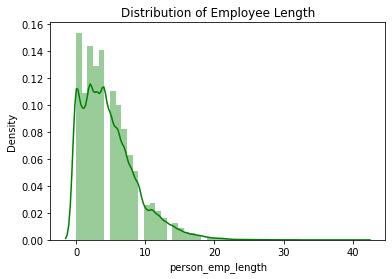

In [ ]:
sns.distplot(credit['person_emp_length'], color = 'green')
plt.title('Distribution of Employee Length')
plt.show()

### person_age

In [ ]:
credit[credit['person_age'] > 80]

# applicant who has age until 123 years old seemse fine to me,
# except they are who 144 years old.
# when you search it through search engine, there's only one who lived around 144 years old.
# we will drop these rows (index 81, 183, and 32297)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,11.011695,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,N,24


In [ ]:
print(f"Before dropping the outliers, numbers of data is {len(credit)} rows.")

print("dropping . . .")
credit.drop(index = [81, 183, 32297], inplace = True)

print(f"After dropping the outliers, numbers of data is {len(credit)} rows.")

Before dropping the outliers, numbers of data is 32579 rows.
dropping . . .
After dropping the outliers, numbers of data is 32576 rows.


In [ ]:
credit[credit['person_age'] > 80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
32416,94,24000,RENT,1.0,MEDICAL,C,6500,11.011695,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,N,24


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


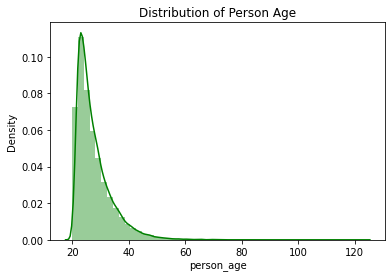

In [ ]:
sns.distplot(credit['person_age'], color = 'green')
plt.title('Distribution of Person Age')
plt.show()

### loan_amnt

In [ ]:
credit[credit['loan_amnt'] > 34000.00]

# loan amount around 30k seems fine to me.
# and we will keep it for training materials.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32158,37,85000,RENT,5.0,DEBTCONSOLIDATION,A,35000,8.90,1,0.41,N,17
32299,65,76000,RENT,3.0,EDUCATION,B,35000,10.99,1,0.46,N,27
32301,53,85000,RENT,19.0,PERSONAL,D,35000,15.65,1,0.41,N,19
32302,58,108350,RENT,5.0,PERSONAL,D,35000,14.91,1,0.32,N,19


### loan_int_rate

In [ ]:
credit[credit['loan_int_rate'] > 21]

# we can't delete these rows, because it makes sense since the greater the interest rate, the bigger the risk of applicants could default their credit
# and we just have 21.82% of default target (1), if we drop it, we could enlarge the gap between these imbalance class.
# we keep these data.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.21,1,0.39,Y,4
1827,24,30000,RENT,5.0,MEDICAL,G,2000,21.27,1,0.07,Y,3
2436,22,23000,RENT,1.0,MEDICAL,F,2800,21.74,1,0.12,N,4
2897,22,35000,MORTGAGE,4.0,VENTURE,F,5000,21.36,0,0.14,Y,2
4899,24,33000,RENT,1.0,MEDICAL,F,5000,21.36,1,0.15,N,2
6449,23,34255,RENT,7.0,VENTURE,G,6000,22.11,1,0.18,Y,3
7470,24,30500,RENT,2.0,EDUCATION,F,6800,21.74,1,0.22,Y,3
13499,26,44000,RENT,4.0,HOMEIMPROVEMENT,G,12500,22.11,1,0.28,Y,2
14487,26,96000,MORTGAGE,2.0,VENTURE,G,10000,21.14,1,0.10,N,3
15223,23,113000,MORTGAGE,0.0,VENTURE,G,19750,21.21,1,0.17,N,4


### loan_percent_income

In [ ]:
credit[credit['loan_percent_income'] > 0.4]

# we can't delete these rows too, because it contains the default target, and we cant drop it again
# since it could enlarge the gap the imbalance class.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32317,66,43000,RENT,17.0,DEBTCONSOLIDATION,D,22250,14.59,1,0.52,Y,23
32318,60,45600,RENT,1.0,PERSONAL,B,20000,10.00,1,0.44,N,20
32369,54,39000,MORTGAGE,4.0,PERSONAL,B,20000,10.71,0,0.51,N,19
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26


## Weight of Evidence (WoE) and Information Value (IV)
trying to binning based on IQR.

In [ ]:
credit.info()

##############################################
# # Binning method
# bin_price =[0,250000,500000,750000, 1000000, 2000000, df['price'].max()]
# label_price = ['upto 250k', 'upto 500k', 'upto 750k','upto 1mil','upto 2mil', 'more than 2 mil']

# df['price_group'] = pd.cut(df['price'], bins = bin_price, labels = label_price)
# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32576 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32576 non-null  int64  
 1   person_income               32576 non-null  int64  
 2   person_home_ownership       32576 non-null  object 
 3   person_emp_length           32576 non-null  float64
 4   loan_intent                 32576 non-null  object 
 5   loan_grade                  32576 non-null  object 
 6   loan_amnt                   32576 non-null  int64  
 7   loan_int_rate               32576 non-null  float64
 8   loan_status                 32576 non-null  int64  
 9   loan_percent_income         32576 non-null  float64
 10  cb_person_default_on_file   32576 non-null  object 
 11  cb_person_cred_hist_length  32576 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


### person_age

In [ ]:
credit['person_age'].describe()

count    32576.000000
mean        27.724276
std          6.249549
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64

In [ ]:
feature = 'person_age'
target = 'loan_status'

# binning=[-float("inf"), 30, 50, float("inf")]
binning=[-float("inf"), 23,26,30, float("inf")]
# binning=[-float("inf"), 30.75,61.5,92.25, float("inf")]

bin_feature = pd.cut(credit[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
woe = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 23.0]",0.262044,0.294076,0.115326,0.005673
"(23.0, 26.0]",0.278849,0.275925,-0.010540,0.005673
"(26.0, 30.0]",0.217284,0.205572,-0.055408,0.005673
"(30.0, inf]",0.241823,0.224427,-0.074659,0.005673


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(credit[feature], bins=binning, labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)

In [ ]:
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326


### person_emp_length

In [ ]:
credit['person_emp_length'].describe()

count    32576.000000
mean         4.760560
std          3.981108
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

In [ ]:
feature = 'person_emp_length'
target = 'loan_status'

# binning=[-float("inf"), 1, 5, 30, 50, float("inf")]       
  # 0.048
# binning=[-float("inf"), 10.25,20.5,30.75, float("inf")]   
  # 0.012
binning=[-float("inf"), 2,4,7, float("inf")]                
  # 0.057

bin_feature = pd.cut(credit[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
woe_emplength = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_emplength

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 2.0]",0.311320,0.413677,0.284264,0.057403
"(2.0, 4.0]",0.221249,0.223442,0.009860,0.057403
"(4.0, 7.0]",0.249244,0.205431,-0.193322,0.057403
"(7.0, inf]",0.218187,0.157450,-0.326241,0.057403


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(credit[feature], bins=binning, labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326,-0.055408
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540,0.115326
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326,-0.010540
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540,-0.074659
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326,0.115326


### loan_amnt

In [ ]:
credit['loan_amnt'].describe()

count    32576.000000
mean      9588.669573
std       6320.602711
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
feature = 'loan_amnt'
target = 'loan_status'

# binning=[-float("inf"),6250,12500,18750, float("inf")]
  # 0.076385
binning=[-float("inf"),5000,8000,12200, float("inf")]
  # 0.076423

bin_feature = pd.cut(credit[feature], 
                     bins=binning)

woe_loan = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_loan

loan_status,0,1,woe,iv
loan_amnt,,,,
"(-inf, 5000.0]",0.296282,0.273111,-0.081433,0.076423
"(5000.0, 8000.0]",0.239428,0.171240,-0.335190,0.076423
"(8000.0, 12200.0]",0.239899,0.214577,-0.111551,0.076423
"(12200.0, inf]",0.224390,0.341072,0.418707,0.076423


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(credit[feature], bins=binning, labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE,loan_amnt_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326,-0.055408,0.115326
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540,0.115326,-0.010540
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326,-0.010540,-0.074659
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540,-0.074659,-0.074659
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326,0.115326,0.115326


### loan_int_rate

In [ ]:
credit['loan_int_rate'].describe()

count    32576.000000
mean        11.011521
std          3.081566
min          5.420000
25%          8.490000
50%         11.011695
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [ ]:
feature = 'loan_int_rate'
target = 'loan_status'

# binning=[-float("inf"),5.5,11,16.5, float("inf")]
  # 0.422037
binning=[-float("inf"),8.5,11.012,13.11, float("inf")]
  # 0.509178

bin_feature = pd.cut(credit[feature], 
                     bins=binning)

woe = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe

loan_status,0,1,woe,iv
loan_int_rate,,,,
"(-inf, 8.5]",0.300247,0.114957,-0.960048,0.509178
"(8.5, 11.012]",0.311555,0.230196,-0.302647,0.509178
"(11.012, 13.11]",0.205740,0.167863,-0.203469,0.509178
"(13.11, inf]",0.182457,0.486985,0.981718,0.509178


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(
                                  credit[feature], 
                                  bins=binning, 
                                  labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326,-0.055408,0.115326,-0.203469
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540,0.115326,-0.010540,-0.203469
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326,-0.010540,-0.074659,0.981718
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540,-0.074659,-0.074659,0.981718
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326,0.115326,0.115326,-0.960048


### loan_percent_income

In [ ]:
credit['loan_percent_income'].describe()

count    32576.000000
mean         0.170207
std          0.106754
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [ ]:
feature = 'loan_percent_income'
target = 'loan_status'

# binning=[-float("inf"),0.2075,0.415,0.6225, float("inf")]
  # 0.586803
binning=[-float("inf"), 0.09,0.15,0.23, float("inf")]
  # 0.611674

bin_feature = pd.cut(credit[feature], 
                     bins=binning)

woe = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe

loan_status,0,1,woe,iv
loan_percent_income,,,,
"(-inf, 0.09]",0.310770,0.145350,-0.759911,0.611674
"(0.09, 0.15]",0.282029,0.148445,-0.641795,0.611674
"(0.15, 0.23]",0.246064,0.201914,-0.197751,0.611674
"(0.23, inf]",0.161137,0.504292,1.140899,0.611674


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(
                                  credit[feature], 
                                  bins=binning, 
                                  labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,loan_percent_income_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326,-0.055408,0.115326,-0.203469,-0.641795
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540,0.115326,-0.010540,-0.203469,1.140899
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326,-0.010540,-0.074659,0.981718,1.140899
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540,-0.074659,-0.074659,0.981718,1.140899
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326,0.115326,0.115326,-0.960048,1.140899


### cb_person_cred_hist_length

In [ ]:
credit['cb_person_cred_hist_length'].describe()

count    32576.000000
mean         5.803966
std          4.053791
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [ ]:
feature = 'cb_person_cred_hist_length'
target = 'loan_status'

# binning=[-float("inf"),7.5,15,22.5, float("inf")]
binning=[-float("inf"),3,4,8, float("inf")]

bin_feature = pd.cut(credit[feature], 
                     bins=binning)

woe = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe

loan_status,0,1,woe,iv
cb_person_cred_hist_length,,,,
"(-inf, 3.0]",0.360281,0.383988,0.063726,0.003566
"(3.0, 4.0]",0.180690,0.186014,0.029037,0.003566
"(4.0, 8.0]",0.234874,0.219361,-0.068329,0.003566
"(8.0, inf]",0.224155,0.210637,-0.062199,0.003566


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(
                                  credit[feature], 
                                  bins=binning, 
                                  labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,loan_percent_income_WOE,cb_person_cred_hist_length_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326,-0.055408,0.115326,-0.203469,-0.641795,0.063726
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540,0.115326,-0.010540,-0.203469,1.140899,0.063726
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326,-0.010540,-0.074659,0.981718,1.140899,0.063726
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540,-0.074659,-0.074659,0.981718,1.140899,0.029037
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326,0.115326,0.115326,-0.960048,1.140899,0.063726


### person_income

In [ ]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32576.0,27.724276,6.249549,20.000000,23.000000,26.000000,30.000000,1.230000e+02
person_income,32576.0,65879.286530,52530.427367,4000.000000,38500.000000,55000.000000,79200.000000,2.039784e+06
person_emp_length,32576.0,4.760560,3.981108,0.000000,2.000000,4.000000,7.000000,4.100000e+01
loan_amnt,32576.0,9588.669573,6320.602711,500.000000,5000.000000,8000.000000,12200.000000,3.500000e+04
loan_int_rate,32576.0,11.011521,3.081566,5.420000,8.490000,11.011695,13.110000,2.322000e+01
loan_status,32576.0,0.218167,0.413008,0.000000,0.000000,0.000000,0.000000,1.000000e+00
loan_percent_income,32576.0,0.170207,0.106754,0.000000,0.090000,0.150000,0.230000,8.300000e-01
cb_person_cred_hist_length,32576.0,5.803966,4.053791,2.000000,3.000000,4.000000,8.000000,3.000000e+01
person_age_WOE,32576.0,-0.001574,0.074785,-0.074659,-0.055408,-0.010540,0.115326,1.153265e-01
person_emp_length_WOE,32576.0,0.007561,0.079268,-0.074659,-0.055408,-0.010540,0.115326,1.153265e-01


In [ ]:
feature = 'person_income'
target = 'loan_status'

# binning=[-float("inf"), 100000,500000,700000, float("inf")]
  # 0.101265
binning=[-float("inf"), 38500,55000,79200, float("inf")]
  # 0.436687

bin_feature = pd.cut(credit[feature], 
                     bins=binning)

woe = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe

loan_status,0,1,woe,iv
person_income,,,,
"(-inf, 38500.0]",0.193019,0.455326,0.858225,0.436687
"(38500.0, 55000.0]",0.254270,0.246940,-0.029252,0.436687
"(55000.0, 79200.0]",0.262280,0.193331,-0.305010,0.436687
"(79200.0, inf]",0.290432,0.104404,-1.023099,0.436687


In [ ]:
credit[f'{feature}_WOE'] = pd.cut(
                                  credit[feature], 
                                  bins=binning, 
                                  labels=woe['woe'].unique())
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,loan_percent_income_WOE,cb_person_cred_hist_length_WOE,person_income_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.115326,-0.055408,0.115326,-0.203469,-0.641795,0.063726,0.858225
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.010540,0.115326,-0.010540,-0.203469,1.140899,0.063726,0.858225
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.115326,-0.010540,-0.074659,0.981718,1.140899,0.063726,-0.305010
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.010540,-0.074659,-0.074659,0.981718,1.140899,0.029037,-0.029252
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.115326,0.115326,0.115326,-0.960048,1.140899,0.063726,0.858225


### Boxplot After WoE

In [ ]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32576.0,27.724276,6.249549,20.000000,23.000000,26.000000,30.000000,1.230000e+02
person_income,32576.0,65879.286530,52530.427367,4000.000000,38500.000000,55000.000000,79200.000000,2.039784e+06
person_emp_length,32576.0,4.760560,3.981108,0.000000,2.000000,4.000000,7.000000,4.100000e+01
loan_amnt,32576.0,9588.669573,6320.602711,500.000000,5000.000000,8000.000000,12200.000000,3.500000e+04
loan_int_rate,32576.0,11.011521,3.081566,5.420000,8.490000,11.011695,13.110000,2.322000e+01
loan_status,32576.0,0.218167,0.413008,0.000000,0.000000,0.000000,0.000000,1.000000e+00
loan_percent_income,32576.0,0.170207,0.106754,0.000000,0.090000,0.150000,0.230000,8.300000e-01
cb_person_cred_hist_length,32576.0,5.803966,4.053791,2.000000,3.000000,4.000000,8.000000,3.000000e+01
person_age_WOE,32576.0,-0.001574,0.074785,-0.074659,-0.055408,-0.010540,0.115326,1.153265e-01
person_emp_length_WOE,32576.0,0.007561,0.079268,-0.074659,-0.055408,-0.010540,0.115326,1.153265e-01


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

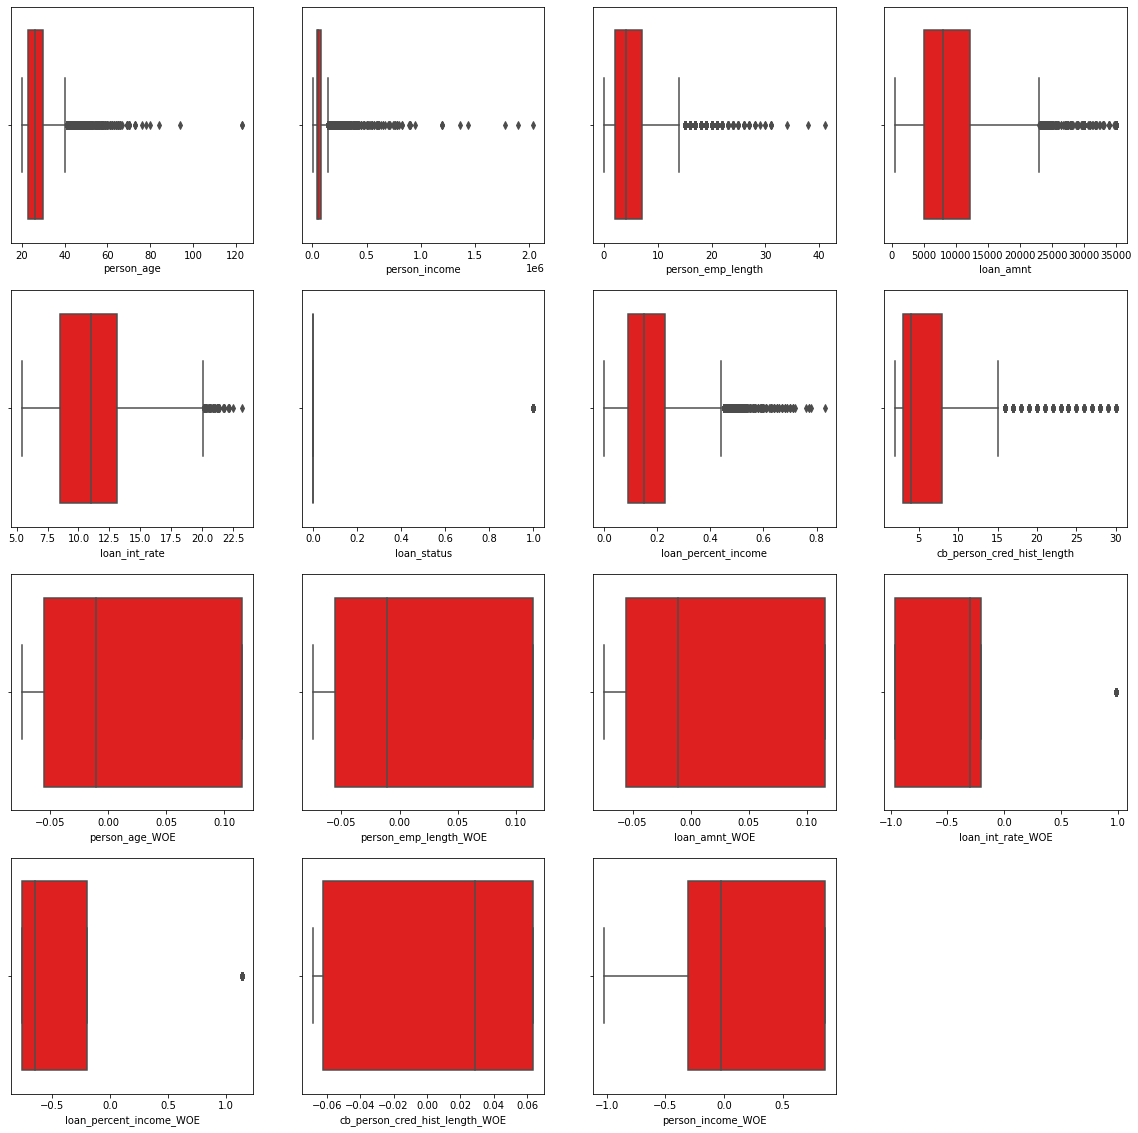

In [ ]:
plt.figure(figsize = (20,20))

n = 1
for name in credit.describe().columns:
  plt.subplot(4,4,n)
  sns.boxplot(credit[name], color = 'r')
  n += 1

plt.show()

## Feature Engineering

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32576 entries, 1 to 32580
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32576 non-null  int64  
 1   person_income                   32576 non-null  int64  
 2   person_home_ownership           32576 non-null  object 
 3   person_emp_length               32576 non-null  float64
 4   loan_intent                     32576 non-null  object 
 5   loan_grade                      32576 non-null  object 
 6   loan_amnt                       32576 non-null  int64  
 7   loan_int_rate                   32576 non-null  float64
 8   loan_status                     32576 non-null  int64  
 9   loan_percent_income             32576 non-null  float64
 10  cb_person_default_on_file       32576 non-null  object 
 11  cb_person_cred_hist_length      32576 non-null  int64  
 12  person_age_WOE                  

### Dummy Variable

In [ ]:
# dummy variable for categorical features

credit = pd.concat([credit,pd.get_dummies(credit[['person_home_ownership', 'loan_intent']],
                               drop_first=True)], axis=1).reset_index(drop=True)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,cb_person_cred_hist_length_WOE,person_income_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0.063726,0.858225,0,1,0,1,0,0,0,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0.063726,0.858225,0,0,0,0,0,1,0,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0.063726,-0.305010,0,0,1,0,0,1,0,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0.029037,-0.029252,0,0,1,0,0,1,0,0
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0.063726,0.858225,0,1,0,0,0,0,0,1


### Label Encoding

##### cb_person_default_on_file

In [ ]:
# transform categorical into binary value

credit['cb_person_default_on_file'] = credit['cb_person_default_on_file'].map({
    'Y' : 1,
    'N' : 0
})

credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,cb_person_cred_hist_length_WOE,person_income_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0.063726,0.858225,0,1,0,1,0,0,0,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0.063726,0.858225,0,0,0,0,0,1,0,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0.063726,-0.305010,0,0,1,0,0,1,0,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0.029037,-0.029252,0,0,1,0,0,1,0,0
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0.063726,0.858225,0,1,0,0,0,0,0,1


#### loan_grade

In [ ]:
# ordinal categorical

grade_encode = {}
v = 1

for n in sorted(credit['loan_grade'].unique()):
  grade_encode[n] = v
  v += 1

grade_encode

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [ ]:
credit['loan_grade'] = credit['loan_grade'].map(grade_encode)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,cb_person_cred_hist_length_WOE,person_income_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,21,9600,OWN,5.0,EDUCATION,2,1000,11.14,0,0.10,...,0.063726,0.858225,0,1,0,1,0,0,0,0
1,25,9600,MORTGAGE,1.0,MEDICAL,3,5500,12.87,1,0.57,...,0.063726,0.858225,0,0,0,0,0,1,0,0
2,23,65500,RENT,4.0,MEDICAL,3,35000,15.23,1,0.53,...,0.063726,-0.305010,0,0,1,0,0,1,0,0
3,24,54400,RENT,8.0,MEDICAL,3,35000,14.27,1,0.55,...,0.029037,-0.029252,0,0,1,0,0,1,0,0
4,21,9900,OWN,2.0,VENTURE,1,2500,7.14,1,0.25,...,0.063726,0.858225,0,1,0,0,0,0,0,1


## Splitting Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
print(f"After all these processes, our dataset has {len(credit)} rows.")
print(f"80% of this dataset is: {len(credit)*0.8 :.0f} rows for modeling.")
print(f"20% of this dataset is: {len(credit)*0.2 :.0f} rows for holdout sample.")

After all these processes, our dataset has 32576 rows.
80% of this dataset is: 26061 rows for modeling.
20% of this dataset is: 6515 rows for holdout sample.


In [ ]:
# dataset for modelling - 80%
credit_model = credit.loc[:26060]

# dataset for holdout sample - 20%
credit_holdout = credit.loc[26060:]

In [ ]:
print(f"Dataset for modeling has {len(credit_model)} rows.")
print(f"Dataset for holdout sample has {len(credit_holdout)} rows.")

Dataset for modeling has 26061 rows.
Dataset for holdout sample has 6516 rows.


In [ ]:
credit_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      26061 non-null  int64  
 1   person_income                   26061 non-null  int64  
 2   person_home_ownership           26061 non-null  object 
 3   person_emp_length               26061 non-null  float64
 4   loan_intent                     26061 non-null  object 
 5   loan_grade                      26061 non-null  int64  
 6   loan_amnt                       26061 non-null  int64  
 7   loan_int_rate                   26061 non-null  float64
 8   loan_status                     26061 non-null  int64  
 9   loan_percent_income             26061 non-null  float64
 10  cb_person_default_on_file       26061 non-null  int64  
 11  cb_person_cred_hist_length      26061 non-null  int64  
 12  person_age_WOE                  

In [ ]:
credit_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 26060 to 32575
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      6516 non-null   int64  
 1   person_income                   6516 non-null   int64  
 2   person_home_ownership           6516 non-null   object 
 3   person_emp_length               6516 non-null   float64
 4   loan_intent                     6516 non-null   object 
 5   loan_grade                      6516 non-null   int64  
 6   loan_amnt                       6516 non-null   int64  
 7   loan_int_rate                   6516 non-null   float64
 8   loan_status                     6516 non-null   int64  
 9   loan_percent_income             6516 non-null   float64
 10  cb_person_default_on_file       6516 non-null   int64  
 11  cb_person_cred_hist_length      6516 non-null   int64  
 12  person_age_WOE               

In [ ]:
# Splitting dataset for feature selection

X_init = credit_model.drop(['loan_status','person_home_ownership', 'loan_intent'], axis = 1)
y_init = credit_model['loan_status']

X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X_init, 
                                                                        y_init, 
                                                                        test_size = 0.2, 
                                                                        random_state = 88, 
                                                                        stratify = y_init)

## Feature Selection

In [ ]:
# using LogReg with L1 regularization

initial = LogisticRegression(penalty= 'l1',
                             C = 1,
                             solver = 'liblinear')
initial.fit(X_train_init, y_train_init)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
feature_importance_df = pd.DataFrame(
    {
        'feature': X_init.columns,
        'importance': abs(initial.coef_)[0],        
    }
)
select_from_model = feature_importance_df.sort_values(by='importance', ascending=False)
select_from_model

,feature,importance
6,loan_percent_income,14.002825
11,loan_amnt_WOE,7.655567
10,person_emp_length_WOE,1.789665
17,person_home_ownership_OWN,1.743541
14,cb_person_cred_hist_length_WOE,1.173597
9,person_age_WOE,1.079938
3,loan_grade,1.028083
23,loan_intent_VENTURE,1.002669
19,loan_intent_EDUCATION,0.830802
18,person_home_ownership_RENT,0.781119


In [ ]:
# importance > 0.30
select_from_model[select_from_model['importance'] > 0.3]['feature'].unique()

array(['loan_percent_income', 'loan_amnt_WOE', 'person_emp_length_WOE',
       'person_home_ownership_OWN', 'cb_person_cred_hist_length_WOE',
       'person_age_WOE', 'loan_grade', 'loan_intent_VENTURE',
       'loan_intent_EDUCATION', 'person_home_ownership_RENT',
       'loan_intent_PERSONAL', 'loan_intent_HOMEIMPROVEMENT'],
      dtype=object)

In [ ]:
# selecting importance > 0.30

# selected_feat =   ['loan_percent_income', 'person_age_WOE',
#          'person_home_ownership_OWN', 'loan_intent_VENTURE', 'loan_grade',
#          'loan_intent_EDUCATION', 'person_home_ownership_RENT',
#          'loan_intent_PERSONAL', 'person_emp_length_WOE',
#          'loan_intent_HOMEIMPROVEMENT', 
#          'loan_status']

selected_feat = ['loan_percent_income', 'loan_amnt_WOE', 'person_emp_length_WOE',
       'person_home_ownership_OWN', 'loan_grade', 'loan_intent_VENTURE',
       'loan_intent_EDUCATION', 'person_home_ownership_RENT',
       'person_age_WOE', 'cb_person_cred_hist_length_WOE',
       'loan_intent_PERSONAL', 'loan_intent_HOMEIMPROVEMENT',
       'loan_status']

# masking dataset for modelling purposes
credit_selected = credit_model[selected_feat]

# masking dataset for holdout purposes
credit_holdout  = credit_holdout[selected_feat]

In [ ]:
# from 27 features, 13 features selected.

credit_selected.head()

,loan_percent_income,loan_amnt_WOE,person_emp_length_WOE,person_home_ownership_OWN,loan_grade,loan_intent_VENTURE,loan_intent_EDUCATION,person_home_ownership_RENT,person_age_WOE,cb_person_cred_hist_length_WOE,loan_intent_PERSONAL,loan_intent_HOMEIMPROVEMENT,loan_status
0,0.10,0.115326,-0.055408,1,2,0,1,0,0.115326,0.063726,0,0,0
1,0.57,-0.010540,0.115326,0,3,0,0,0,-0.010540,0.063726,0,0,1
2,0.53,-0.074659,-0.010540,0,3,0,0,1,0.115326,0.063726,0,0,1
3,0.55,-0.074659,-0.074659,0,3,0,0,1,-0.010540,0.029037,0,0,1
4,0.25,0.115326,0.115326,1,1,1,0,0,0.115326,0.063726,0,0,1


In [ ]:
credit_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_percent_income             26061 non-null  float64
 1   loan_amnt_WOE                   26061 non-null  float64
 2   person_emp_length_WOE           26061 non-null  float64
 3   person_home_ownership_OWN       26061 non-null  uint8  
 4   loan_grade                      26061 non-null  int64  
 5   loan_intent_VENTURE             26061 non-null  uint8  
 6   loan_intent_EDUCATION           26061 non-null  uint8  
 7   person_home_ownership_RENT      26061 non-null  uint8  
 8   person_age_WOE                  26061 non-null  float64
 9   cb_person_cred_hist_length_WOE  26061 non-null  float64
 10  loan_intent_PERSONAL            26061 non-null  uint8  
 11  loan_intent_HOMEIMPROVEMENT     26061 non-null  uint8  
 12  loan_status                     

In [ ]:
credit_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 26060 to 32575
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_percent_income             6516 non-null   float64
 1   loan_amnt_WOE                   6516 non-null   float64
 2   person_emp_length_WOE           6516 non-null   float64
 3   person_home_ownership_OWN       6516 non-null   uint8  
 4   loan_grade                      6516 non-null   int64  
 5   loan_intent_VENTURE             6516 non-null   uint8  
 6   loan_intent_EDUCATION           6516 non-null   uint8  
 7   person_home_ownership_RENT      6516 non-null   uint8  
 8   person_age_WOE                  6516 non-null   float64
 9   cb_person_cred_hist_length_WOE  6516 non-null   float64
 10  loan_intent_PERSONAL            6516 non-null   uint8  
 11  loan_intent_HOMEIMPROVEMENT     6516 non-null   uint8  
 12  loan_status                  

## Modelling

c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


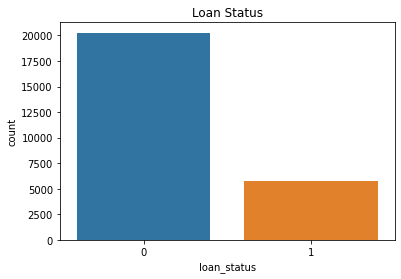

In [ ]:
sns.countplot(credit_selected['loan_status'])
plt.title('Loan Status')
plt.show()

# has more non default applicant (0) than the default (1)
  # non default   : 77.7215%	
  # default       : 22.2785%

# Error Type:
#   Type 1: predict default (1), actual non default (0)
#   Type 2: predict non-default (0), actual default (1) <-- riskier in business decision

# For business purposes, we assume to minimize Type 2 (minimize False Negative).
  # Hence, we use Recall metrics for optimum result

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score

In [ ]:
def evaluate(true, predicted):

    rec = recall_score(true, predicted)
    f1s = f1_score(true, predicted)
    auc = roc_auc_score(true, predicted) 
    return rec,f1s,auc

def print_evaluate(true, predicted):
    
    rec = recall_score(true, predicted)
    f1s = f1_score(true, predicted)
    auc = roc_auc_score(true, predicted)

    print(' Recall:', rec)
    print(' F1-score:', f1s)
    print(' AUC:', auc)

In [ ]:
# Splitting into Train and Test set

X = credit_selected.drop('loan_status', axis = 1)
y = credit_selected['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 88, 
                                                    stratify = y)

In [ ]:
# Scaling for distance based algorithm

scaler_robust = RobustScaler()

X_train_sc = scaler_robust.fit_transform(X_train)
X_test_sc = scaler_robust.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Logistic Regression

In [ ]:
lr_t = LogisticRegression()

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
    "C"      : np.logspace(-5,5,20),
    "max_iter" : [100, 500, 1000]
}

grid_lr = GridSearchCV(
    estimator = lr_t,
    param_grid = param_lr,
    cv = 5,
    scoring = 'roc_auc',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_lr.fit(X_train_sc, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82231169        nan 0.86884023        nan 0.82231169
        nan 0.86884023        nan 0.82231169        nan 0.86884023
        nan 0.82373809        nan 0.86884023        nan 0.82373809
        nan 0.86884023        nan 0.82373809        nan 0.86884023
        nan 0.82797459        nan 0.86884023        nan 0.82797459
        nan 0.86884023        nan 0.82797459        nan 0.86884023
        nan 0.83773898        nan 0.86884023        nan 0.83773898
        nan 0.86884023        nan 0.83773898        nan 0.86884023
        nan 0.85073191        nan 0.86884023        nan 0.85073191
        nan 0.86884023        nan 0.85073191        nan 0.86884023
        nan 0.86088443        nan 0.86884023        nan 0.86088443
        nan 0.86884023        nan 0.86088443        nan 0.86884023
        nan 0.86623416  

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [ ]:
grid_lr.best_params_

{'C': 1e-05, 'max_iter': 100, 'penalty': 'none'}

In [ ]:
pred_lrt = grid_lr.predict(X_test_sc)
train_lrt = grid_lr.predict(X_train_sc)

In [ ]:
print(classification_report(y_test, pred_lrt))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4052
           1       0.76      0.52      0.62      1161

    accuracy                           0.86      5213
   macro avg       0.82      0.74      0.77      5213
weighted avg       0.85      0.86      0.85      5213



In [ ]:
print('Train set evaluation:')
print_evaluate(y_train, train_lrt)

print('\n')

print('Test set evaluation:')
print_evaluate(y_test, pred_lrt)

Train set evaluation:
 Recall: 0.5252960172228203
 F1-score: 0.6187396982376061
 AUC: 0.7378995052478354


Test set evaluation:
 Recall: 0.524547803617571
 F1-score: 0.6211116777154513
 AUC: 0.7387052937140175


In [ ]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test'], 
                                    ['Recall', 'F1-Score','AUC']
                                    ])

result_lrt = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_lrt)),
         'Test' : list(evaluate(y_test, pred_lrt))}
         ).unstack().values], 
         columns = index)

result_lrt.insert(loc=0, column='Model', value = 'LogisticRegression')
result_lrt

Model     Train                       Test                    
                         Recall F1-Score     AUC    Recall  F1-Score       AUC
0  LogisticRegression  0.525296  0.61874  0.7379  0.524548  0.621112  0.738705

### Random Forest

In [ ]:
rf_t = RandomForestClassifier()
param_rf = {
    "n_estimators" : [10,25,30,50,100,500],
    "max_depth" : [1,2,4,5,6],
    "min_samples_leaf" : np.linspace(0.07, 0.2, 30),
}

grid_rf = RandomizedSearchCV(
    estimator = rf_t,
    param_distributions = param_rf,
    cv = 5,
    scoring = 'roc_auc',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4, 5, 6],
                                        'min_samples_leaf': array([0.07      , 0.07448276, 0.07896552, 0.08344828, 0.08793103,
       0.09241379, 0.09689655, 0.10137931, 0.10586207, 0.11034483,
       0.11482759, 0.11931034, 0.1237931 , 0.12827586, 0.13275862,
       0.13724138, 0.14172414, 0.1462069 , 0.15068966, 0.15517241,
       0.15965517, 0.16413793, 0.16862069, 0.17310345, 0.17758621,
       0.18206897, 0.18655172, 0.19103448, 0.19551724, 0.2       ]),
                                        'n_estimators': [10, 25, 30, 50, 100,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [ ]:
grid_rf.best_params_

{'n_estimators': 25, 'min_samples_leaf': 0.07, 'max_depth': 1}

In [ ]:
pred_rft = grid_rf.predict(X_test)
train_rft = grid_rf.predict(X_train)

In [ ]:
print('Train set evaluation:')
print_evaluate(y_train, train_rft)

print('\n')

print('Test set evaluation:')
print_evaluate(y_test, pred_rft)

Train set evaluation:
 Recall: 0.0
 F1-score: 0.0
 AUC: 0.5


Test set evaluation:
 Recall: 0.0
 F1-score: 0.0
 AUC: 0.5


In [ ]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test'], 
                                    ['Recall', 'F1-Score','AUC']
                                    ])
result_rft = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_rft)),
         'Test' : list(evaluate(y_test, pred_rft))}
         ).unstack().values], 
         columns=index)

result_rft.insert(loc=0, column='Model', value = 'RandomForest')
result_rft

Model  Train                 Test              
                Recall F1-Score  AUC Recall F1-Score  AUC
0  RandomForest    0.0      0.0  0.5    0.0      0.0  0.5

### XGBoost

In [ ]:
xg_t = XGBClassifier()

param_xg = {
    "n_estimators" : [10, 20, 25, 30, 50, 100, 500],
    "learning_rate" : np.linspace(0.08, 4, 20),
    "subsample" : [0.1, 0.5, 1, 4, 7]
}

grid_xg = RandomizedSearchCV(
    estimator = xg_t,
    param_distributions = param_xg,
    cv = 10,
    scoring = 'roc_auc',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 100
)

In [ ]:
grid_xg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.73444283        nan 0.63391429        nan 0.594017   0.85999225
 0.59119413 0.77992296 0.68361949 0.87442117 0.82936762        nan
 0.69567771        nan 0.721392   0.890986   0.89187455 0.67886208
 0.89969896        nan 0.8782206  0.594017          nan        nan
 0.8850667  0.87007578 0.90765371 0.62478548 0.67311065        nan
        nan 0.89242497        nan        nan 0.64619748 0.68574524
 0.63842286        nan        nan        nan 0.86750173 0.8943435
        nan 0.90780362 0.88921908        nan        nan 0.91345815
        nan 0.64405128 0.87623741        nan        nan 0.88466707
 0.89374772        nan 0.70298995 0.71306105        nan 0.89385238
 0.73633835 0.63053214        nan        nan        nan 0.68085077
 0.87952831 0.75972067 0.70960299 0.6882299         nan 0.67311065
 0.84547411 0.69567771 0.

[02:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.08      , 0.28631579, 0.49263158, 0.69894737, 0.90526316,
       1.111578

In [ ]:
grid_xg.best_params_

{'subsample': 1, 'n_estimators': 30, 'learning_rate': 0.2863157894736842}

In [ ]:
pred_xgt = grid_xg.predict(X_test)
train_xgt = grid_xg.predict(X_train)

In [ ]:
print('Train set evaluation:')
print_evaluate(y_train, train_xgt)

print('\n')

print('Test set evaluation:')
print_evaluate(y_test, pred_xgt)

Train set evaluation:
 Recall: 0.6955866523143165
 F1-score: 0.8132393657186004
 AUC: 0.8456332323473699


Test set evaluation:
 Recall: 0.6890611541774333
 F1-score: 0.7984031936127746
 AUC: 0.8392245553710462


In [ ]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test'], 
                                    ['Recall', 'F1-Score', 'AUC']
                                    ])
result_xgt = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_xgt)),
         'Test' : list(evaluate(y_test, pred_xgt))}
         ).unstack().values], 
         columns=index)

result_xgt.insert(loc=0, column='Model', value = 'XGBoost')
result_xgt

Model     Train                          Test                    
              Recall  F1-Score       AUC    Recall  F1-Score       AUC
0  XGBoost  0.695587  0.813239  0.845633  0.689061  0.798403  0.839225

In [ ]:
tuned_xg = grid_xg.best_estimator_

## Model Results

In [ ]:
result_all = pd.concat(
    [result_lrt, 
     result_rft, 
     result_xgt], 
     axis=0)

In [ ]:
result_all

Model     Train                          Test            \
                         Recall  F1-Score       AUC    Recall  F1-Score   
0  LogisticRegression  0.525296  0.618740  0.737900  0.524548  0.621112   
0        RandomForest  0.000000  0.000000  0.500000  0.000000  0.000000   
0             XGBoost  0.695587  0.813239  0.845633  0.689061  0.798403   

             
        AUC  
0  0.738705  
0  0.500000  
0  0.839225

## Holdout Sample

In [ ]:
credit_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 26060 to 32575
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_percent_income             6516 non-null   float64
 1   loan_amnt_WOE                   6516 non-null   float64
 2   person_emp_length_WOE           6516 non-null   float64
 3   person_home_ownership_OWN       6516 non-null   uint8  
 4   loan_grade                      6516 non-null   int64  
 5   loan_intent_VENTURE             6516 non-null   uint8  
 6   loan_intent_EDUCATION           6516 non-null   uint8  
 7   person_home_ownership_RENT      6516 non-null   uint8  
 8   person_age_WOE                  6516 non-null   float64
 9   cb_person_cred_hist_length_WOE  6516 non-null   float64
 10  loan_intent_PERSONAL            6516 non-null   uint8  
 11  loan_intent_HOMEIMPROVEMENT     6516 non-null   uint8  
 12  loan_status                  

In [ ]:
# Imbalanced target too

credit_holdout['loan_status'].value_counts() / len(credit_holdout) * 100

0    80.033763
1    19.966237
Name: loan_status, dtype: float64

In [ ]:
# Define X and y for predict the holdout sample

X_holdout = credit_holdout.drop('loan_status', 
                                axis = 1)
y_holdout = credit_holdout['loan_status']

### Logistic Regression

In [ ]:
# without scaler

holdout_lr = grid_lr.predict(X_holdout)
print_evaluate(y_holdout, holdout_lr)

 Recall: 0.9800153727901614
 F1-score: 0.3702090592334495
 AUC: 0.5765848676031344


In [ ]:
# with scaler

holdout_lr = grid_lr.predict(scaler_robust.transform(X_holdout))
print_evaluate(y_holdout, holdout_lr)

 Recall: 0.4704073789392775
 F1-score: 0.5842482100238664
 AUC: 0.7177540250401084


In [ ]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test', 'Holdout Sample'], 
                                    ['Recall', 'F1-Score','AUC']
                                    ])

result_holdout_lr = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_lrt)),
         'Test' : list(evaluate(y_test, pred_lrt)),
         'Holdout Sample' : list(evaluate(y_holdout, holdout_lr))}
         ).unstack().values], 
         columns = index)

result_holdout_lr.insert(loc=0, column='Model', value = 'LogisticRegression')
result_holdout_lr

Model     Train                       Test            \
                         Recall F1-Score     AUC    Recall  F1-Score   
0  LogisticRegression  0.525296  0.61874  0.7379  0.524548  0.621112   

            Holdout Sample                      
        AUC         Recall  F1-Score       AUC  
0  0.738705       0.470407  0.584248  0.717754

### Random Forest

In [ ]:
holdout_rf = grid_rf.predict(X_holdout)
print_evaluate(y_holdout, holdout_rf)

 Recall: 0.0
 F1-score: 0.0
 AUC: 0.5


In [ ]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test', 'Holdout Sample'], 
                                    ['Recall', 'F1-Score','AUC']
                                    ])

result_holdout_rf = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_rft)),
         'Test' : list(evaluate(y_test, pred_rft)),
         'Holdout Sample' : list(evaluate(y_holdout, holdout_rf)) }
         ).unstack().values], 
         columns = index)

result_holdout_rf.insert(loc=0, column='Model', value = 'RandomForest')
result_holdout_rf

Model  Train                 Test               Holdout Sample  \
                Recall F1-Score  AUC Recall F1-Score  AUC         Recall   
0  RandomForest    0.0      0.0  0.5    0.0      0.0  0.5            0.0   

                 
  F1-Score  AUC  
0      0.0  0.5

### XGBoost

In [ ]:
holdout_xg = grid_xg.predict(X_holdout)
print_evaluate(y_holdout, holdout_xg)

 Recall: 0.6963873943120676
 F1-score: 0.8024800708591674
 AUC: 0.8433039560246819


In [ ]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test', 'Holdout Sample'], 
                                    ['Recall', 'F1-Score','AUC']
                                    ])

result_holdout_xg = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_xgt)),
         'Test' : list(evaluate(y_test, pred_xgt)),
         'Holdout Sample' : list(evaluate(y_holdout, holdout_xg))}
         ).unstack().values], 
         columns = index)

result_holdout_xg.insert(loc=0, column='Model', value = 'XGBoost')
result_holdout_xg

Model     Train                          Test                      \
              Recall  F1-Score       AUC    Recall  F1-Score       AUC   
0  XGBoost  0.695587  0.813239  0.845633  0.689061  0.798403  0.839225   

  Holdout Sample                     
          Recall F1-Score       AUC  
0       0.696387  0.80248  0.843304

## Holdout Sample Result

In [ ]:
holdout_all = pd.concat(
                        [result_holdout_lr, 
                        result_holdout_rf, 
                        result_holdout_xg], 
                        axis=0)
holdout_all

Model     Train                          Test            \
                         Recall  F1-Score       AUC    Recall  F1-Score   
0  LogisticRegression  0.525296  0.618740  0.737900  0.524548  0.621112   
0        RandomForest  0.000000  0.000000  0.500000  0.000000  0.000000   
0             XGBoost  0.695587  0.813239  0.845633  0.689061  0.798403   

            Holdout Sample                      
        AUC         Recall  F1-Score       AUC  
0  0.738705       0.470407  0.584248  0.717754  
0  0.500000       0.000000  0.000000  0.500000  
0  0.839225       0.696387  0.802480  0.843304

## Export Model

In [ ]:
import pickle

In [ ]:
with open('xgb_without_pipe', 'wb') as name:
  pickle.dump(tuned_xg, name)

## Conclusions
Since this case is an imbalanced dataset `(non-default:77.7% ; default:22.3%)`, it's worth looking at the AUC and Recall metrics instead. Why? Especially for Recall metrics. For business purposes, we assume to minimize Type 2 (minimize False Negative -- *predict non-default (0), actual default (1)*). Hence, we use Recall metrics for optimum result.

It can be seen in the table above, the model which has the highest and the most stable AUC and Recall is `XGBoost AUC: 0.839225` and `XGBoost Recall: 0.689061`.

In addition, the Recall and AUC scores on the train and test are not much different. It means that we can conclude that this model is 'just right' to classify `target 1` and `target 0`, neither overfitting nor underfitting.

If we look back at the features importance by Logistic Regression with Lasso regularization, the selected features seem make sense. Features which affect `loan_status` are:
1. Percentage of Income *`('loan_percent_income')`*, 
1. Loan Amount *`('loan_amnt_WOE')`*,
9. Employement Length *`('person_emp_length_WOE')`*,
3. Owning Home *`('person_home_ownership_OWN')`*,
5. Loan Grade *`('loan_grade')`*,
4. Intention for Venture *`('loan_intent_VENTURE')`*, 
6. Intention for Education *`('loan_intent_EDUCATION')`*, 
7. Renting home *`('person_home_ownership_RENT')`*,
2. Age *`('person_age_WOE')`*,
1. Credit History Length *`('cb_person_cred_hist_length_WOE')`*,
8. Intention for personal purposes *`('loan_intent_PERSONAL')`*,         
10. Intention for home improvement *`('loan_intent_HOMEIMPROVEMENT')`*.

After tuning the models and get each metrics, we could predict the holdout sample using our previous models. We see that the XGBoost algorithm shows its best performance among the others. In the holdout sample, XGBoost can reach the `AUC: 0.843304` and the `Recall: 0.696387`. It tells us that XGBoost could be our model for production, because it's not overfitted and it can predicts the holdout sample very well.

# Pipeline Model

### Splitting Data

In [ ]:
credit = pd.read_csv('C:\\Users\\brian\\Documents\\DataScience\\ODP BNI x Mars\\trial_deployment\\credit_risk_dataset.csv')

In [ ]:
# Splitting into Train and Test set

X = credit.drop('loan_status', axis = 1)
y = credit['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 88, 
                                                    stratify = y)

In [ ]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15817,24,168000,MORTGAGE,0.0,PERSONAL,E,25000,16.45,0.15,N,3
826,23,74800,RENT,1.0,MEDICAL,E,20000,17.04,0.23,Y,2
27171,27,125000,MORTGAGE,2.0,EDUCATION,A,8000,6.76,0.06,N,10
17060,24,62000,RENT,1.0,MEDICAL,C,1600,13.85,0.03,Y,4
15272,26,60000,RENT,7.0,DEBTCONSOLIDATION,A,15000,6.03,0.25,N,3


### Setup The Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols_categoric_nominal = ['person_home_ownership', 'loan_intent']
cols_categoric_ordinal = ['loan_grade', 'cb_person_default_on_file']
cols_categoric         = ['loan_grade', 'cb_person_default_on_file', 'person_home_ownership', 'loan_intent']
cols_num               = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [ ]:
# Numeric
pipe_num = Pipeline([
                     ('scaler', RobustScaler())
])

# nominal categorical
pipe_categoric_nom = Pipeline([
                     ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

pipe_preprocess = ColumnTransformer([
                               ('categoric', pipe_categoric_nom, cols_categoric),
                               ('numeric', pipe_num, cols_num)
])

### Training the Model
using the best algorithm based on the previous training.

In [ ]:
xg = XGBClassifier()

pipe_xg = Pipeline([
                    ('preps', pipe_preprocess),
                    ('algo', xg)
])

param_xg = {
    "algo__n_estimators" : [10, 20, 25, 30, 50, 100, 500],
    "algo__learning_rate" : np.linspace(0.08, 4, 20),
    "algo__subsample" : [0.1, 0.5, 1, 4, 7]
}

gridpipe_xg = RandomizedSearchCV(
                                estimator = pipe_xg,
                                param_distributions = param_xg,
                                cv = 3,
                                scoring = 'roc_auc',
                                refit = True,
                                n_jobs = -1,
                                verbose = 3,
                                n_iter = 100
)

In [ ]:
gridpipe_xg.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.60472722        nan 0.65378796        nan        nan        nan
        nan 0.67186151 0.51968804        nan 0.83774956        nan
 0.94019314        nan 0.93943142        nan        nan        nan
        nan        nan 0.60509978 0.90209305 0.88085011 0.76827214
        nan        nan 0.58973293        nan 0.63513838 0.90429913
 0.58388849        nan 0.83455553        nan        nan 0.63382831
        nan 0.8041135  0.56303339 0.8630595         nan        nan
        nan 0.8423999         nan 0.91452727 0.49846122 0.8822557
 0.55033206        nan        nan        nan 0.76893662        nan
        nan 0.90375293        nan        nan 0.89855724        nan
        nan 0.93266136 0.9341817  0.91099285 0.68569625        nan
 0.93621439 0.66192931 0.66117559        nan 0.93507316        nan
        nan        nan 0.

[03:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preps',
                                              ColumnTransformer(transformers=[('categoric',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['loan_grade',
                                                                                'cb_person_default_on_file',
                                                                                'person_home_ownership',
                                                                                'loan_intent']),
                                                                              ('numeric',
                                                                               Pipeline

In [ ]:
pred_pipexg = gridpipe_xg.predict(X_test)
train_pipexg = gridpipe_xg.predict(X_train)

In [ ]:
tuned_pipexg = gridpipe_xg.best_estimator_

### Export Model

In [ ]:
import pickle

#### Model with Steps

In [ ]:
with open('xgb_piped', 'wb') as name:
  pickle.dump(tuned_pipexg, name)

In [ ]:
print(classification_report(y_test, tuned_pipexg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.96      0.73      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



#### Model only and Steps only

In [ ]:
final_model = gridpipe_xg.best_estimator_.named_steps['algo']
final_pipe  = gridpipe_xg.best_estimator_.named_steps['preps']

In [ ]:
with open('xgb_piped_model_only', 'wb') as name: # save model
    pickle.dump(final_model, name)
    
with open('xgb_piped_preps_only', 'wb') as name: # save pipeline
    pickle.dump(final_pipe, name)

### Predict the Single Test Data

In [ ]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15817,24,168000,MORTGAGE,0.0,PERSONAL,E,25000,16.45,0.15,N,3
826,23,74800,RENT,1.0,MEDICAL,E,20000,17.04,0.23,Y,2
27171,27,125000,MORTGAGE,2.0,EDUCATION,A,8000,6.76,0.06,N,10
17060,24,62000,RENT,1.0,MEDICAL,C,1600,13.85,0.03,Y,4
15272,26,60000,RENT,7.0,DEBTCONSOLIDATION,A,15000,6.03,0.25,N,3


In [ ]:
X_test.iloc[0].to_json()

'{"person_age":24,"person_income":168000,"person_home_ownership":"MORTGAGE","person_emp_length":0.0,"loan_intent":"PERSONAL","loan_grade":"E","loan_amnt":25000,"loan_int_rate":16.45,"loan_percent_income":0.15,"cb_person_default_on_file":"N","cb_person_cred_hist_length":3}'

In [ ]:
# MODEL WITH PIPELINED
# predicting single data

data_pred = pd.DataFrame(data = [X_test.iloc[0].values],
                         columns = ['person_age', 'person_income', 'person_home_ownership',
                                    'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
                                    'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
                                    'cb_person_cred_hist_length'])

pred = tuned_pipexg.predict(data_pred)[0]
proba = tuned_pipexg.predict_proba(data_pred)


if pred == 0:
  pred = "Non-default"
  proba = f"{round(proba[0][0]*100, 2)}%"
  print(proba, pred)
else:
  pred =  "Default"
  proba = f"{round(proba[0][1]*100, 2)}%"
  print(proba, pred)

87.76% Non-default
